In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Carriageway hazards

In [5]:
df_hcac = df[['carriageway_hazards', 'accident_severity']]
df_hcac

,carriageway_hazards,accident_severity
0,0,3
1,0,3
6,0,3
7,0,3
8,0,3
...,...,...
285307,0,3
285312,0,3
285313,0,3
285314,0,3


In [6]:
df_hcac['carriageway_hazards'].value_counts()

0    109913
2       365
6       220
3       135
7       129
1        80
Name: carriageway_hazards, dtype: int64

In [7]:
df_hcac['carriageway_hazards'].replace(0, 'none', inplace=True)
df_hcac['carriageway_hazards'].replace(1, 'vehicle on road', inplace=True)
df_hcac['carriageway_hazards'].replace(2, 'other object', inplace=True)
df_hcac['carriageway_hazards'].replace(3, 'previous accident', inplace=True)
df_hcac['carriageway_hazards'].replace(6, 'pedestrian', inplace=True)
df_hcac['carriageway_hazards'].replace(7, 'animal', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
df_hcac

,carriageway_hazards,accident_severity
0,none,3
1,none,3
6,none,3
7,none,3
8,none,3
...,...,...
285307,none,3
285312,none,3
285313,none,3
285314,none,3


In [10]:
df_hcac3 = df_hcac[df_hcac['accident_severity'] == 3]
df_hcac2 = df_hcac[df_hcac['accident_severity'] == 2]
df_hcac1 = df_hcac[df_hcac['accident_severity'] == 1]

print(df_hcac3['carriageway_hazards'].unique())
print(df_hcac2['carriageway_hazards'].unique())
print(df_hcac1['carriageway_hazards'].unique())

['none' 'previous accident' 'other object' 'animal' 'pedestrian'
 'vehicle on road']
['none' 'pedestrian' 'previous accident' 'animal' 'vehicle on road'
 'other object']
['none' 'pedestrian' 'other object' 'animal']


In [20]:
print(df_hcac3['carriageway_hazards'].value_counts())
y3 = df_hcac3['carriageway_hazards'].value_counts()
y3.to_frame()

none                 95911
other object           310
pedestrian             193
animal                 112
previous accident       86
vehicle on road         74
Name: carriageway_hazards, dtype: int64


,carriageway_hazards
none,95911
other object,310
pedestrian,193
animal,112
previous accident,86
vehicle on road,74


In [24]:
df_hcactot = pd.DataFrame({'accident severity 3': y3})
df_hcactot

,accident severity 3
none,95911
other object,310
pedestrian,193
animal,112
previous accident,86
vehicle on road,74


In [25]:
print(df_hcac2['carriageway_hazards'].value_counts())
y2 = df_hcac2['carriageway_hazards'].value_counts()
y2.to_list

none                 13140
previous accident       49
other object            46
pedestrian              24
animal                  13
vehicle on road          6
Name: carriageway_hazards, dtype: int64


<bound method IndexOpsMixin.tolist of none                 13140
previous accident       49
other object            46
pedestrian              24
animal                  13
vehicle on road          6
Name: carriageway_hazards, dtype: int64>

In [26]:
df_hcactot.insert(1, 'accident severity 2', [0, 46, 24, 13, 49, 6], True)
df_hcactot

,accident severity 3,accident severity 2
none,95911,0
other object,310,46
pedestrian,193,24
animal,112,13
previous accident,86,49
vehicle on road,74,6


In [27]:
print(df_hcac1['carriageway_hazards'].value_counts())
y1 = df_hcac1['carriageway_hazards'].value_counts()
y1.to_list

none            862
other object      9
animal            4
pedestrian        3
Name: carriageway_hazards, dtype: int64


<bound method IndexOpsMixin.tolist of none            862
other object      9
animal            4
pedestrian        3
Name: carriageway_hazards, dtype: int64>

In [28]:
df_hcactot.insert(2, 'accident severity 1', [0, 9, 3, 4, 0, 0], True)
df_hcactot

,accident severity 3,accident severity 2,accident severity 1
none,95911,0,0
other object,310,46,9
pedestrian,193,24,3
animal,112,13,4
previous accident,86,49,0
vehicle on road,74,6,0


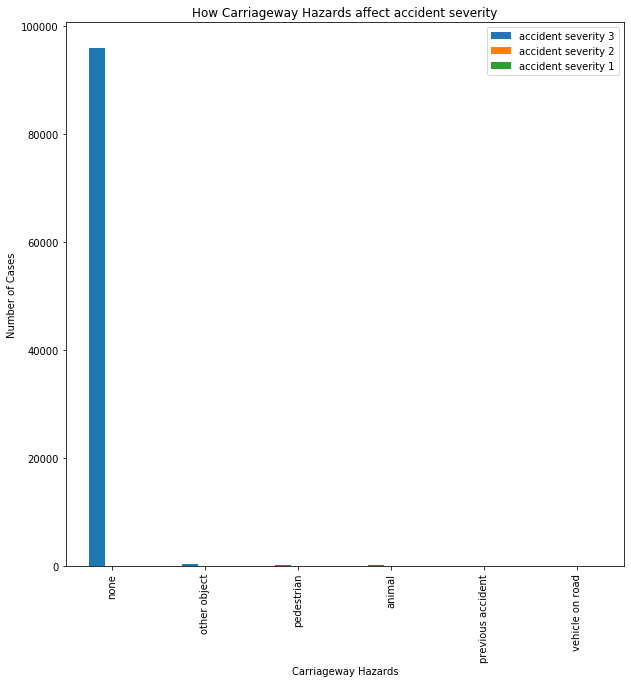

In [29]:
df_hcactot.plot(kind='bar', figsize=(10,10))
plt.xlabel('Carriageway Hazards')
plt.ylabel('Number of Cases')
plt.title('How Carriageway Hazards affect accident severity')
plt.show()

In [32]:
df_hcactot_mod = df_hcactot
df_hcactot_mod

,accident severity 3,accident severity 2,accident severity 1
none,0,0,0
other object,310,46,9
pedestrian,193,24,3
animal,112,13,4
previous accident,86,49,0
vehicle on road,74,6,0


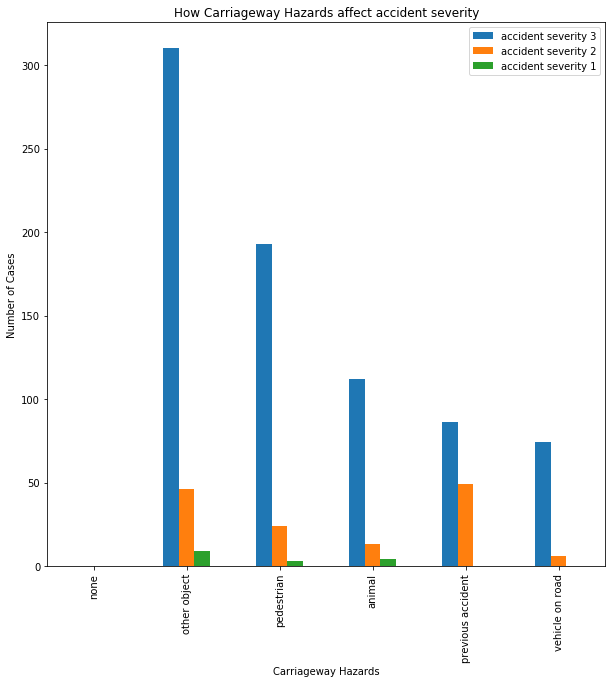

In [33]:
df_hcactot_mod.plot(kind='bar', figsize=(10,10))
plt.xlabel('Carriageway Hazards')
plt.ylabel('Number of Cases')
plt.title('How Carriageway Hazards affect accident severity')
plt.show()